## Regularization in Regression

### Lasso Regression

True Coefficients: [ 2 -3  0  0]
OLS Coefficients: [ 2.09260769 -2.88034535 -0.13044744  0.12299156]
Lasso Coefficients: [ 2.03246678 -2.81987583 -0.          0.00453936]
OLS MSE: 0.4125379492493975
Lasso MSE: 0.40699367937936287


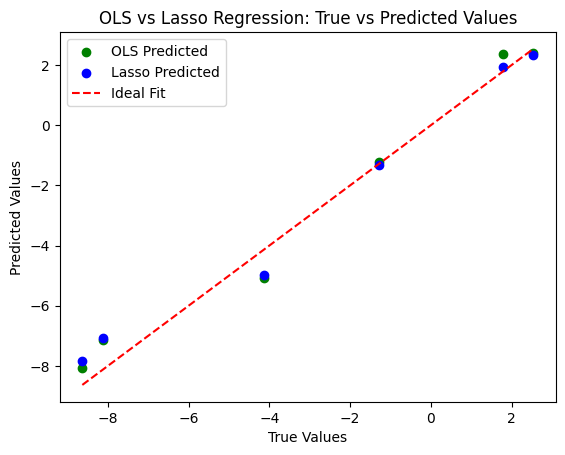

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generating sample data with 4 features
np.random.seed(0)
X = np.random.randn(30, 4)  # 100 samples, 4 features
# True coefficients for generating the target variable y (only 2 features are relevant)
true_coefs = np.array([2, -3, 0, 0])  
y = X.dot(true_coefs) + np.random.randn(30) * 0.5  # Add some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply Ordinary Least Squares (OLS) without regularization
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_coefs = ols.coef_

# Apply Lasso Regression with regularization parameter alpha
lasso = Lasso(alpha=0.1)  # Adjust alpha to control regularization strength
lasso.fit(X_train, y_train)
lasso_coefs = lasso.coef_

# Predict on test data with OLS and Lasso
y_pred_ols = ols.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Mean Squared Error for both OLS and Lasso
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Display the results
print(f"True Coefficients: {true_coefs}")
print(f"OLS Coefficients: {ols_coefs}")
print(f"Lasso Coefficients: {lasso_coefs}")
print(f"OLS MSE: {mse_ols}")
print(f"Lasso MSE: {mse_lasso}")

# Plotting true vs predicted values for OLS and Lasso
plt.scatter(y_test, y_pred_ols, color='green', label='OLS Predicted')
plt.scatter(y_test, y_pred_lasso, color='blue', label='Lasso Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('OLS vs Lasso Regression: True vs Predicted Values')
plt.legend()
plt.show()


### Ridge Regression

OLS Coefficients: [-0.5 -1.   3. ]
Ridge Coefficients (lambda=0.1): [-0.76163185  0.1915391   2.22909283]
OLS MSE: 0.25
Ridge MSE: 0.2822732542048296


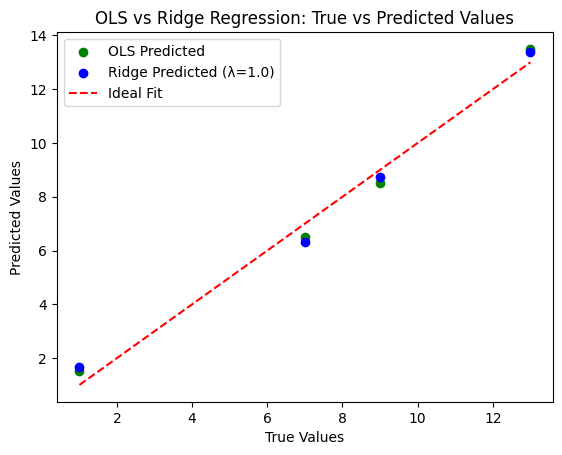

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Example data (features and target)
X = np.array([[1, 1], 
              [2, 3], 
              [3, 4], 
              [4, 6]])  # Independent variables (2 features)

y = np.array([1, 7, 9, 13])  # Dependent variable (target values)

# Add bias term (column of ones) to X for OLS and Ridge (intercept term)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding column of ones

# Closed-form solution for OLS (Ordinary Least Squares)
def ols_solution(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Closed-form solution for Ridge Regression
def ridge_solution(X, y, lambda_value):
    n_features = X.shape[1]
    I = np.eye(n_features)
    return np.linalg.inv(X.T.dot(X) + lambda_value * I).dot(X.T).dot(y)

# Calculate OLS coefficients
beta_ols = ols_solution(X_b, y)

# Set lambda for Ridge Regression
lambda_value = 0.1

# Calculate Ridge Regression coefficients
beta_ridge = ridge_solution(X_b, y, lambda_value)

# Print OLS and Ridge coefficients
print(f"OLS Coefficients: {beta_ols}")
print(f"Ridge Coefficients (lambda={lambda_value}): {beta_ridge}")

# Predictions using OLS and Ridge Regression
y_pred_ols = X_b.dot(beta_ols)
y_pred_ridge = X_b.dot(beta_ridge)

# Mean Squared Error for both OLS and Ridge
mse_ols = mean_squared_error(y, y_pred_ols)
mse_lasso = mean_squared_error(y, y_pred_ridge)
print(f"OLS MSE: {mse_ols}")
print(f"Ridge MSE: {mse_lasso}")

# Plot the true data, OLS predictions, and Ridge predictions
plt.scatter(y, y_pred_ols, color='green', label='OLS Predicted')
plt.scatter(y, y_pred_ridge, color='blue', label='Ridge Predicted (λ=1.0)')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('OLS vs Ridge Regression: True vs Predicted Values')
plt.legend()
plt.show()


### Elastic Net

True Coefficients: [ 2 -3  0  0]
OLS Coefficients: [ 2.09260769 -2.88034535 -0.13044744  0.12299156]
Elastic Net Coefficients: [ 2.07974369 -2.86647491 -0.10462418  0.10068252]
OLS MSE: 0.4125379492493975
Elastic Net MSE: 0.40530836085131355


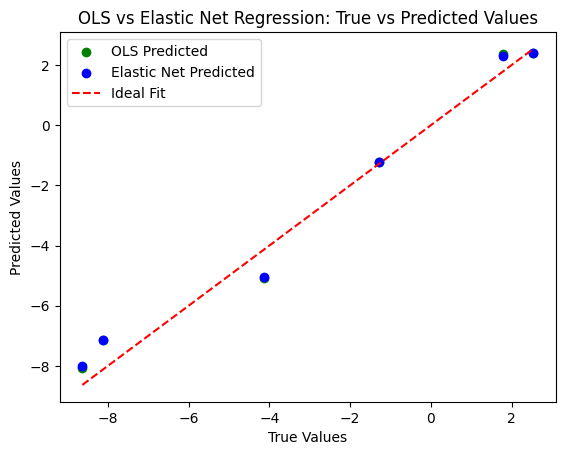

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generating sample data with 4 features
np.random.seed(0)
X = np.random.randn(30, 4)  # 100 samples, 4 features
# True coefficients for generating the target variable y (only 2 features are relevant)
true_coefs = np.array([2, -3, 0, 0])
y = X.dot(true_coefs) + np.random.randn(30) * 0.5  # Add some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply Ordinary Least Squares (OLS) without regularization
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_coefs = ols.coef_

# Apply Elastic Net Regression with regularization parameters alpha and l1_ratio
elastic_net = ElasticNet(alpha=0.02, l1_ratio=0.95)  # l1_ratio balances between L1 and L2 regularization
elastic_net.fit(X_train, y_train)
elastic_net_coefs = elastic_net.coef_

# Predict on test data with OLS and Elastic Net
y_pred_ols = ols.predict(X_test)
y_pred_elastic_net = elastic_net.predict(X_test)

# Mean Squared Error for both OLS and Elastic Net
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Display the results
print(f"True Coefficients: {true_coefs}")
print(f"OLS Coefficients: {ols_coefs}")
print(f"Elastic Net Coefficients: {elastic_net_coefs}")
print(f"OLS MSE: {mse_ols}")
print(f"Elastic Net MSE: {mse_elastic_net}")

# Plotting true vs predicted values for OLS and Elastic Net
plt.scatter(y_test, y_pred_ols, color='green', label='OLS Predicted')
plt.scatter(y_test, y_pred_elastic_net, color='blue', label='Elastic Net Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('OLS vs Elastic Net Regression: True vs Predicted Values')
plt.legend()
plt.show()
